In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
# df = df.sample(frac=0.2, random_state=99)

In [2]:
df.shape

(9917530, 54)

This is a large data set with near 10 million observations.

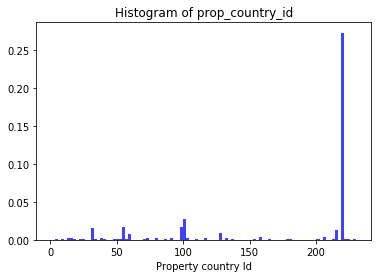

In [4]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(df.prop_country_id, 100, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Property country Id')
plt.title('Histogram of prop_country_id')
plt.show();

In [6]:
df.groupby('prop_country_id').size().nlargest(5)

prop_country_id
219    6052976
100     622810
55      376219
31      309434
99      268393
dtype: int64

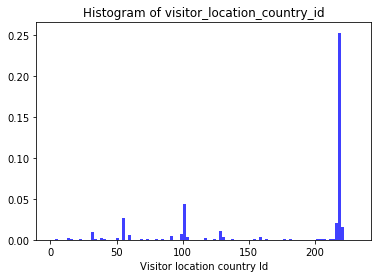

In [7]:
n, bins, patches = plt.hist(df.visitor_location_country_id, 100, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Visitor location country Id')
plt.title('Histogram of visitor_location_country_id')
plt.show();

In [8]:
df.groupby('visitor_location_country_id').size().nlargest(5)

visitor_location_country_id
219    5778805
100     990487
55      580072
216     434568
220     350433
dtype: int64

The data is anonymized, so determining the exact country or city to which a consumer plans to travel to is not possible. However, it is evident that the largest country (labeled 219) is the United States. The largest country has 61% of all observations. Out of those, 58% of searches are made by consumers also located in this country, suggesting that the country has a large territory with a large fraction of domestic travel. The price currency also suggested that the largest country being the United States.

Therefore, to improve the computational efficiency, we are going to predict Click-Through for US visitors.

In [9]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [5]:
us = df.loc[df['visitor_location_country_id'] == 219]
us = us.sample(frac=0.6, random_state=99)
del us['visitor_location_country_id']

In [6]:
us.shape

(3467283, 53)

In [7]:
us.isnull().sum()

srch_id                            0
date_time                          0
site_id                            0
visitor_hist_starrating      3326522
visitor_hist_adr_usd         3325727
prop_country_id                    0
prop_id                            0
prop_starrating                    0
prop_review_score               3297
prop_brand_bool                    0
prop_location_score1               0
prop_location_score2          804564
prop_log_historical_price          0
position                           0
price_usd                          0
promotion_flag                     0
srch_destination_id                0
srch_length_of_stay                0
srch_booking_window                0
srch_adults_count                  0
srch_children_count                0
srch_room_count                    0
srch_saturday_night_bool           0
srch_query_affinity_score    3174829
orig_destination_distance     431936
random_bool                        0
comp1_rate                   3425367
c

As you can see, we have a lot of missing data in many features. We are going to drop features that have more than 90% of NaN, plus date_time, srch_id, prop_id, and impute the three features, they are prop_review_score, prop_location_score2, orig_destination_distance.

In [7]:
cols_to_drop = ['date_time', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_query_affinity_score', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate', 'comp8_rate', 'comp2_inv', 'comp3_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv', 'comp8_inv', 'gross_bookings_usd', 'srch_id', 'prop_id']
us.drop(cols_to_drop, axis=1, inplace=True)

In [9]:
us.isnull().sum()

site_id                           0
prop_country_id                   0
prop_starrating                   0
prop_review_score              3297
prop_brand_bool                   0
prop_location_score1              0
prop_location_score2         804564
prop_log_historical_price         0
position                          0
price_usd                         0
promotion_flag                    0
srch_destination_id               0
srch_length_of_stay               0
srch_booking_window               0
srch_adults_count                 0
srch_children_count               0
srch_room_count                   0
srch_saturday_night_bool          0
orig_destination_distance    431936
random_bool                       0
click_bool                        0
booking_bool                      0
dtype: int64

### prop_review_score, Random imputation

In [8]:
import random
def randomiseMissingData(df2):
    "randomise missing data for DataFrame (within a column)"
    df = df2.copy()
    for col in df.columns:
        data = df['prop_review_score']
        mask = data.isnull()
        samples = random.choices( data[~mask].values , k = mask.sum() )
        data[mask] = samples
    return df

In [9]:
us = randomiseMissingData(us)

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
us['prop_review_score'].mean()

3.8523584605006285

In [13]:
def randomiseMissingData(df2):
    "randomise missing data for DataFrame (within a column)"
    df = df2.copy()
    for col in df.columns:
        data = df['prop_location_score2']
        mask = data.isnull()
        samples = random.choices( data[~mask].values , k = mask.sum() )
        data[mask] = samples
    return df

In [14]:
us = randomiseMissingData(us)

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### prop_location_score2, mean imputation

In [11]:
us['prop_location_score2'].mean()

0.12443283778729275

In [12]:
us['prop_location_score2'].fillna((us['prop_location_score2'].mean()), inplace=True)

### orig_destination_distance, Impute with median

In [13]:
us['orig_destination_distance'].fillna((us['orig_destination_distance'].median()), inplace=True)

In [14]:
us.isnull().sum()

site_id                      0
prop_country_id              0
prop_starrating              0
prop_review_score            0
prop_brand_bool              0
prop_location_score1         0
prop_location_score2         0
prop_log_historical_price    0
position                     0
price_usd                    0
promotion_flag               0
srch_destination_id          0
srch_length_of_stay          0
srch_booking_window          0
srch_adults_count            0
srch_children_count          0
srch_room_count              0
srch_saturday_night_bool     0
orig_destination_distance    0
random_bool                  0
click_bool                   0
booking_bool                 0
dtype: int64

## EDA

In [15]:
us.shape

(3467283, 22)

After basic data cleaning, our USA data set contains over 3.4 million observations and 22 features.

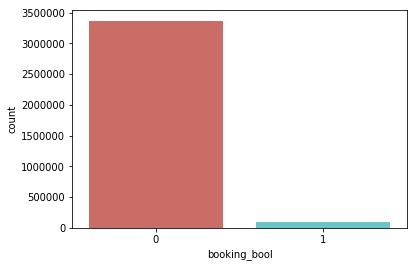

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='booking_bool',data=us, palette='hls')
plt.show();

In [22]:
us['booking_bool'].value_counts()

0    3369149
1      98134
Name: booking_bool, dtype: int64

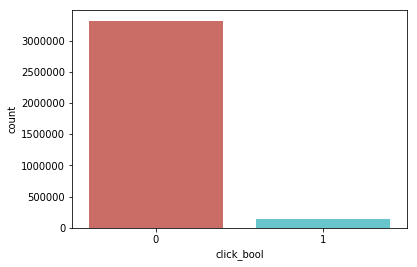

In [23]:
sns.countplot(x='click_bool',data=us, palette='hls')
plt.show();

In [48]:
us['click_bool'].value_counts()

0    3317003
1     150280
Name: click_bool, dtype: int64

Due to the nature of online travel business, both booking rate(2.8%) and click through rate (4.3%) are extremely low. So, the class are very imbalanced.

### Let's explore other features that presented in the data.

search length of stay

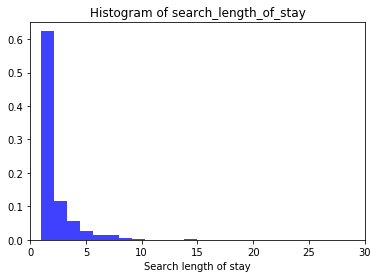

In [25]:
n, bins, patches = plt.hist(us.srch_length_of_stay, 50, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Search length of stay')
plt.title('Histogram of search_length_of_stay')
plt.axis([0, 30, 0, 0.65])
plt.show();

In [26]:
us.groupby('srch_length_of_stay').size().nlargest(5)

srch_length_of_stay
1    1639357
2     870065
3     463313
4     228522
5     106807
dtype: int64

Nothing outlier.

search aults counts

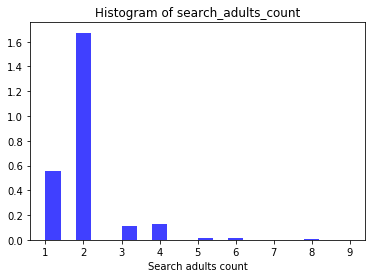

In [27]:
n, bins, patches = plt.hist(us.srch_adults_count, 20, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Search adults count')
plt.title('Histogram of search_adults_count')
plt.show();

In [28]:
df.groupby('srch_adults_count').size().nlargest(5)

srch_adults_count
2    6494969
1    2315541
4     481440
3     475287
6      63323
dtype: int64

The most common search adults count is 2-adults, makes sense.

property star rating

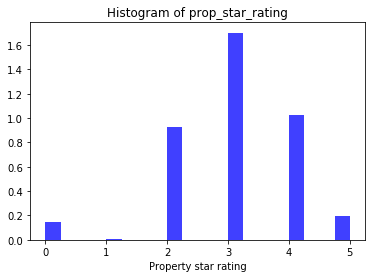

In [29]:
n, bins, patches = plt.hist(us.prop_starrating, 20, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Property star rating')
plt.title('Histogram of prop_star_rating')
plt.show();

The most common property star rating is 3 stars. Good to know, I would have thought higher.

In [30]:
us.groupby('prop_brand_bool').size()

prop_brand_bool
0     925574
1    2541709
dtype: int64

More than 73% of the properties are brand properties. It does make sense since we are talking about US hotels and US travelers.

In [31]:
us.groupby('srch_saturday_night_bool').size()

srch_saturday_night_bool
0    1589888
1    1877395
dtype: int64

Over 54% of searches contain staying at Saturday.

Price USD

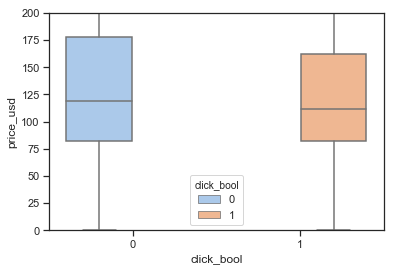

In [32]:
sns.set(style="ticks", palette="pastel")

ax = sns.boxplot(x="click_bool", y="price_usd", hue="click_bool", data=us)
ax.set_ylim([0, 200]);

In [33]:
us.groupby('click_bool')['price_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
click_bool,,,,,,,,
0,3317003.0,159.784904,1443.170964,0.04,82.0,119.0,178.0,505455.0
1,150280.0,144.195764,845.042969,0.06,82.0,112.0,162.0,172761.0


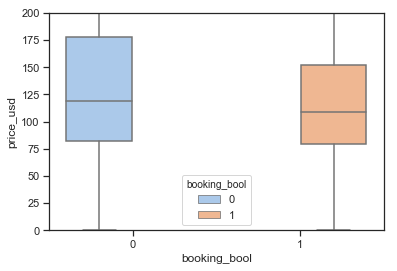

In [34]:
ax = sns.boxplot(x="booking_bool", y="price_usd", hue="booking_bool", data=us)
ax.set_ylim([0, 200]);

In [35]:
us.groupby('booking_bool')['price_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
booking_bool,,,,,,,,
0,3369149.0,159.795939,1434.330155,0.04,82.0,119.0,178.0,505455.0
1,98134.0,135.533224,927.366517,0.06,79.0,109.0,152.0,172761.0


On average, the price_usd that received a click or booking is always lower than those of did not get a click or booking.

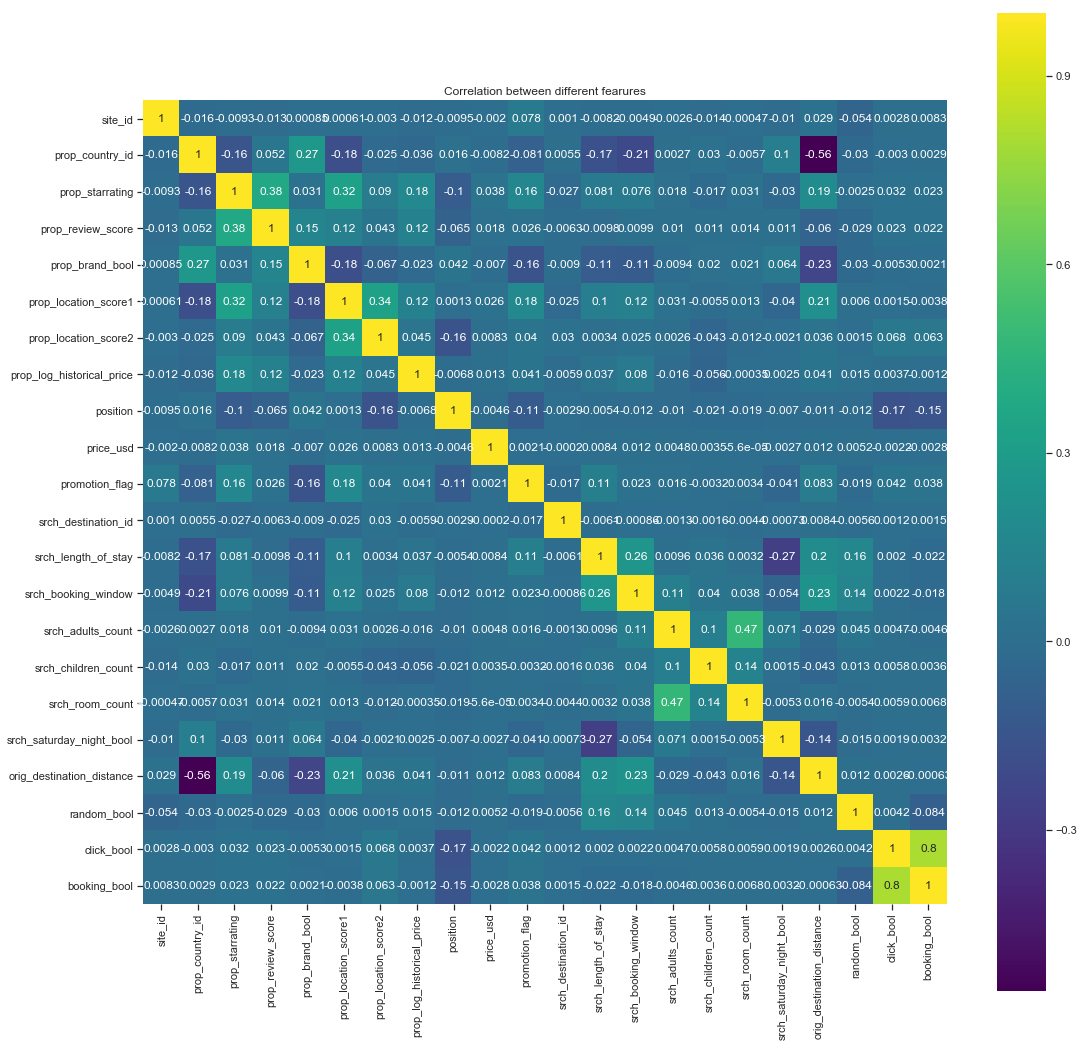

In [37]:
correlation = us.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures');

### Balance  the data

For fast learning, our balancing strategy is down sampling negative instances.

In [16]:
import numpy as np

click_indices = us[us.click_bool == 1].index
random_indices = np.random.choice(click_indices, len(us.loc[us.click_bool == 1]), replace=False)
click_sample = us.loc[random_indices]

not_click = us[us.click_bool == 0].index
random_indices = np.random.choice(not_click, sum(us['click_bool']), replace=False)
not_click_sample = us.loc[random_indices]

us_new = pd.concat([not_click_sample, click_sample], axis=0)

print("Percentage of not click impressions: ", len(us_new[us_new.click_bool == 0])/len(us_new))
print("Percentage of click impression: ", len(us_new[us_new.click_bool == 1])/len(us_new))
print("Total number of records in resampled data: ", len(us_new))

Percentage of not click impressions:  0.5
Percentage of click impression:  0.5
Total number of records in resampled data:  300560


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
mms = MinMaxScaler()
us_new[['price_usd','orig_destination_distance']] = mms.fit_transform(us_new[['price_usd','orig_destination_distance']])

In [114]:
# MinMax=MinMaxScaler()
# df['price_usd']=MinMax.fit_transform(df['price_usd'].values.reshape(-1,1))

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [19]:
Y1=us_new['click_bool'].as_matrix()
Y2=us_new['booking_bool'].as_matrix()
us_new=us_new.drop(['click_bool','booking_bool'], 1)
X=us_new.as_matrix()

In [20]:
np.isnan(np.sum(X))

False

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,Y1,test_size=0.3,random_state=1)

In [ ]:
rf =RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
    bagg = BaggingClassifier(n_estimators=71,random_state=42)
    extra = ExtraTreesClassifier(n_estimators=57,random_state=42)
    ada = AdaBoostClassifier(n_estimators=51,random_state=42)
    grad = GradientBoostingClassifier(n_estimators=101,random_state=42)
    classifier_list = [rf,bagg,extra,ada,grad]
    classifier_name_list = ['Random Forests','Bagging','Extra Trees','AdaBoost','Gradient Boost']
    return classifier_list,classifier_name_list

### Click-through prediction with ensemble models

In [30]:
def get_ensemble_models():
    rf =RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
    bagg = BaggingClassifier(n_estimators=51,random_state=42)
    extra = ExtraTreesClassifier(n_estimators=51,random_state=42)
    ada = AdaBoostClassifier(n_estimators=51,random_state=42)
    grad = GradientBoostingClassifier(n_estimators=51,random_state=42)
    classifier_list = [rf,bagg,extra,ada,grad]
    classifier_name_list = ['Random Forests','Bagging','Extra Trees','AdaBoost','Gradient Boost']
    return classifier_list,classifier_name_list

In [31]:
def print_evaluation_metrics(trained_model,trained_model_name,X_test,y_test):
    print('--------- Model : ', trained_model_name, ' ---------------\n')
    predicted_values = trained_model.predict(X_test)
    print(metrics.classification_report(y_test,predicted_values))
    print("Accuracy Score : ",metrics.accuracy_score(y_test,predicted_values))
    print("---------------------------------------\n")

In [32]:
classifier_list, classifier_name_list = get_ensemble_models()
for classifier,classifier_name in zip(classifier_list,classifier_name_list):
    classifier.fit(X_train,y_train)
    print_evaluation_metrics(classifier,classifier_name,X_test,y_test)

--------- Model :  Random Forests  ---------------

             precision    recall  f1-score   support

          0       0.70      0.70      0.70     45275
          1       0.70      0.70      0.70     44893

avg / total       0.70      0.70      0.70     90168

Accuracy Score :  0.702821400053234
---------------------------------------

--------- Model :  Bagging  ---------------

             precision    recall  f1-score   support

          0       0.69      0.69      0.69     45275
          1       0.69      0.69      0.69     44893

avg / total       0.69      0.69      0.69     90168

Accuracy Score :  0.690732854227664
---------------------------------------

--------- Model :  Extra Trees  ---------------

             precision    recall  f1-score   support

          0       0.69      0.69      0.69     45275
          1       0.69      0.69      0.69     44893

avg / total       0.69      0.69      0.69     90168

Accuracy Score :  0.689368733918907
-------------------

### Click-through prediction with Naive bayes models

In [33]:
def get_naive_bayes_models():
    gnb = GaussianNB()
    mnb = MultinomialNB()
    bnb = BernoulliNB()
    classifier_list = [gnb,mnb,bnb]
    classifier_name_list = ['Gaussian NB','Multinomial NB','Bernoulli NB']
    return classifier_list,classifier_name_list

In [34]:
classifier_list, classifier_name_list = get_naive_bayes_models()
for classifier,classifier_name in zip(classifier_list,classifier_name_list):
    classifier.fit(X_train,y_train)
    print_evaluation_metrics(classifier,classifier_name,X_test,y_test)

--------- Model :  Gaussian NB  ---------------

             precision    recall  f1-score   support

          0       0.70      0.61      0.65     45275
          1       0.65      0.74      0.69     44893

avg / total       0.68      0.67      0.67     90168

Accuracy Score :  0.6745297666577943
---------------------------------------

--------- Model :  Multinomial NB  ---------------

             precision    recall  f1-score   support

          0       0.66      0.63      0.65     45275
          1       0.64      0.68      0.66     44893

avg / total       0.65      0.65      0.65     90168

Accuracy Score :  0.6530698252151539
---------------------------------------

--------- Model :  Bernoulli NB  ---------------

             precision    recall  f1-score   support

          0       0.53      0.77      0.63     45275
          1       0.57      0.31      0.41     44893

avg / total       0.55      0.54      0.52     90168

Accuracy Score :  0.5425871706148523
-----------

### Click-through prediction with Neural network

In [35]:
def get_neural_network(hidden_layer_size=50):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size)
    return [mlp], ['MultiLayer Perceptron']

In [36]:
classifier_list, classifier_name_list = get_neural_network()
for classifier,classifier_name in zip(classifier_list,classifier_name_list):
    classifier.fit(X_train,y_train)
    print_evaluation_metrics(classifier,classifier_name,X_test,y_test)

--------- Model :  MultiLayer Perceptron  ---------------

             precision    recall  f1-score   support

          0       0.51      0.99      0.67     45275
          1       0.72      0.02      0.04     44893

avg / total       0.61      0.51      0.36     90168

Accuracy Score :  0.5086616094401561
---------------------------------------



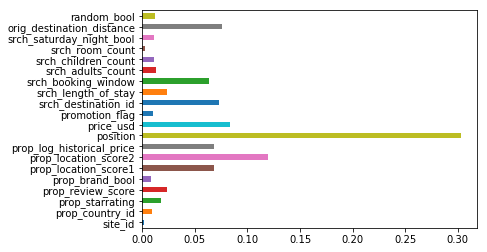

In [47]:
rf = RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
rf.fit(X_train, y_train)
(pd.Series(rf.feature_importances_, index=us_new.columns).plot(kind='barh'))